In [2]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [42]:
house_data = pd.read_csv("train.csv")
print(house_data["CentralAir"])

0       Y
1       Y
2       Y
3       Y
4       Y
       ..
1455    Y
1456    Y
1457    Y
1458    Y
1459    Y
Name: CentralAir, Length: 1460, dtype: object


In [4]:
print("Data type : ", type(house_data))
print("Data dims : ", house_data.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (1460, 81)


In [5]:
print(house_data.dtypes)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object


# Problem 1 : Predicting CentralAir using SalePrice
In this problem, you will build a Classification Tree model to predict CentralAir using SalePrice and judge its accuracy

a) Create appropriate datasets for Train and Test in an 80:20 ratio and fit two Classification Tree models (of max
depth 2 and max depth 4) on the Train set to predict CentralAir using SalePrice. Print the tree in each case.

b) Print the confusion matrix on Train set and Test set for both the aforesaid models. Compute and print for both
the trees the Classification Accuracy, True Positive Rate, False Positive Rate. Which of the two models is better?

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9460616438356164

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.928082191780822



<AxesSubplot:>

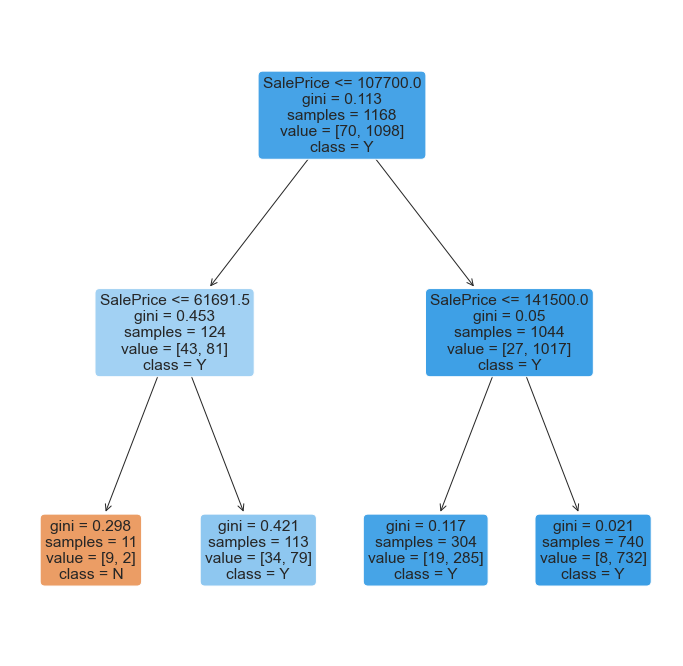

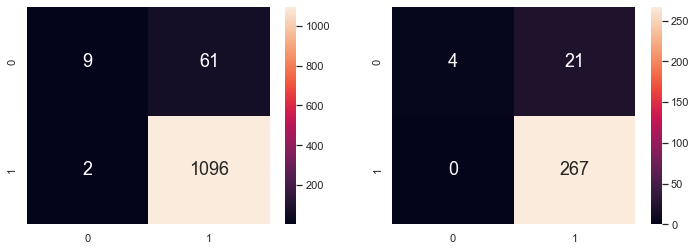

In [6]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Recall the Legendary-Total Dataset
CA = pd.DataFrame(house_data['CentralAir'])   # Response
SP = pd.DataFrame(house_data['SalePrice'])       # Predictor

# Split the Legendary-Total Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(SP, CA, test_size = 0.2)
#X could be a matrix thus capitalized

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2) 
dectree.fit(X_train, y_train)                   

# Predict Legendary values corresponding to Total
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)


# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=["SalePrice"], 
          class_names=["N","Y"])


# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

train set: 61 false positives, 2 false negative

test set: 21 false positives, 0 false negative

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9460616438356164

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9417808219178082



<AxesSubplot:>

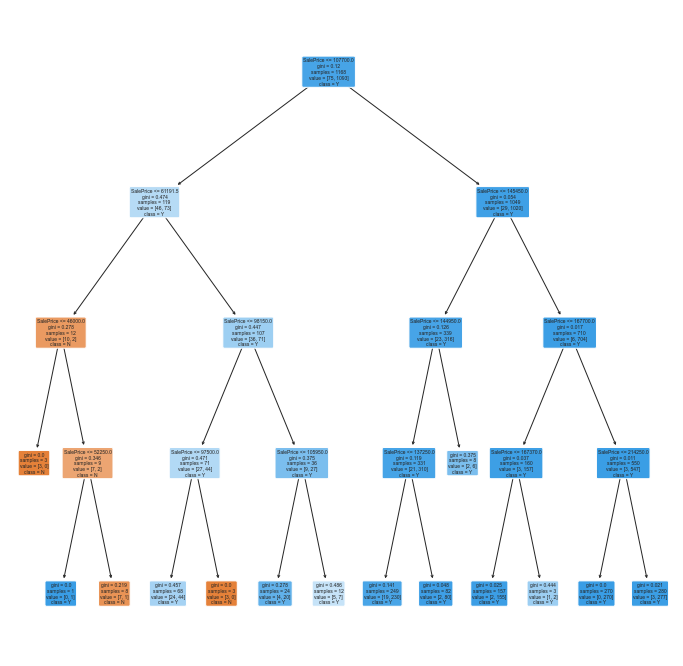

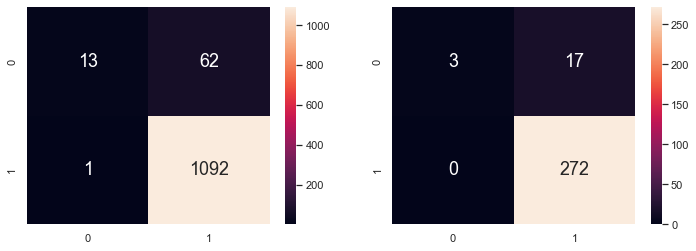

In [8]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Recall the Legendary-Total Dataset
CA = pd.DataFrame(house_data['CentralAir'])   # Response
SP = pd.DataFrame(house_data['SalePrice'])       # Predictor

# Split the CA-SP Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(SP, CA, test_size = 0.2)
#X could be a matrix thus capitalized

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4) 
dectree.fit(X_train, y_train)                   

# Predict Legendary values corresponding to Total
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)


# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=["SalePrice"], 
          class_names=["N","Y"])


# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

train set: 62 false positives, 1 false negative

test set: 17 false positives, 0 false negative

The model with depth 4 is slightly better for the test set, which is what truly matters.

    The classification Acuuracy for depth 4 is higher than that of depth 2 
    Number of false positives for depth 4 is lower than that of depth 2.

# Problem 2 : Predicting CentralAir using Other Variables
Following the steps from the previous problem, build two new uni-variate Classification Tree models (of max depth 4) to
predict CentralAir using the variables OverallQual and YearBuilt. Justify which of the variables is the best predictor.

### OverallQual

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9375

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9417808219178082



<AxesSubplot:>

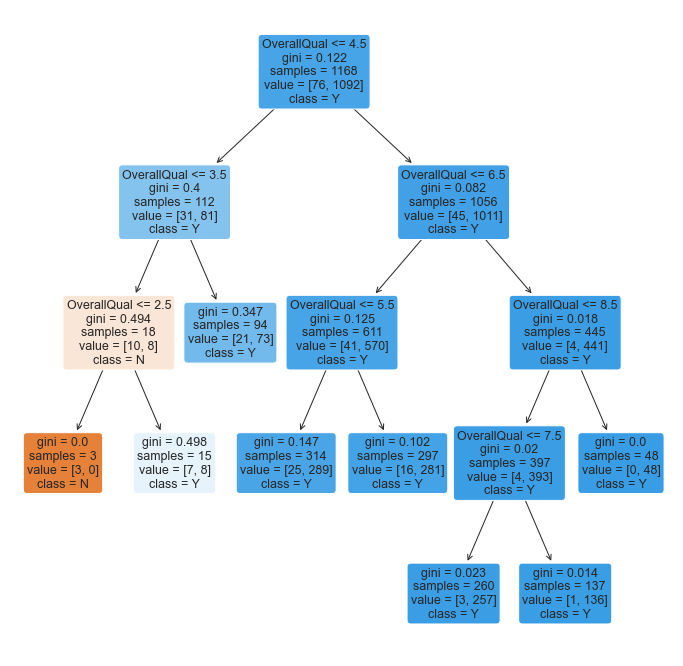

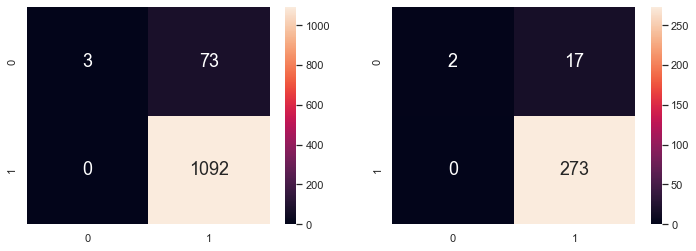

In [9]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Recall the Legendary-Total Dataset
CA = pd.DataFrame(house_data['CentralAir'])   # Response
OQ = pd.DataFrame(house_data['OverallQual'])       # Predictor

# Split the CA-OQ Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(OQ, CA, test_size = 0.2)
#X could be a matrix thus capitalized

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4) 
dectree.fit(X_train, y_train)                   

# Predict CA values corresponding to OQ
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)


# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=["OverallQual"], 
          class_names=["N","Y"])


# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

train set: 73 false positives, 0 false negative

test set: 17 false positives, 0 false negative

### YearBuilt

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9392123287671232

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9246575342465754



<AxesSubplot:>

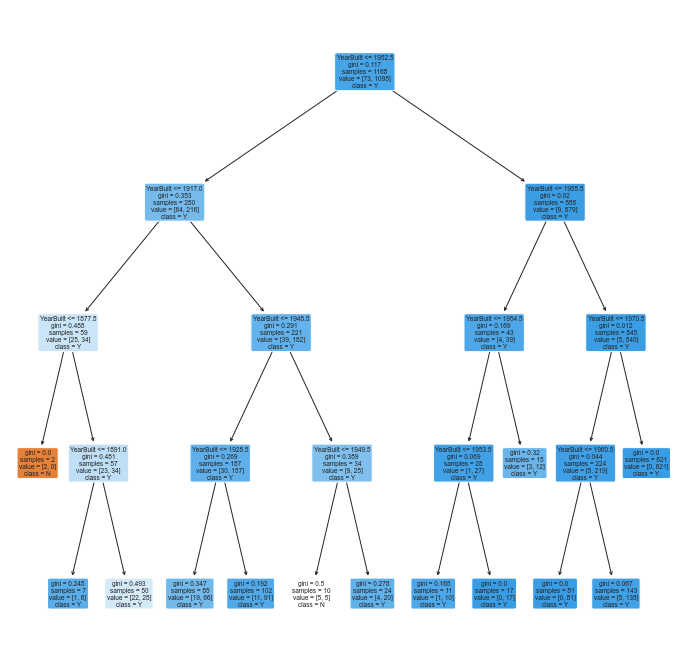

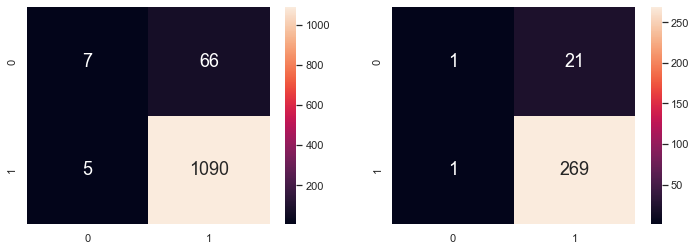

In [10]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Recall the Legendary-Total Dataset
CA = pd.DataFrame(house_data['CentralAir'])   # Response
YB = pd.DataFrame(house_data['YearBuilt'])       # Predictor

# Split the CA-YB Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(YB, CA, test_size = 0.2)
#X could be a matrix thus capitalized

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4) 
dectree.fit(X_train, y_train)                   

# Predict CA values corresponding to YB
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)


# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=["YearBuilt"], 
          class_names=["N","Y"])


# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

train set: 66 false positives, 5 false negative

test set: 21 false positives, 1 false negative

OverallQual is a better predictor as the Classification Accuracy is higher than that of YearBuilt. There is also a lower number of false positives

# Problem 3 : Understanding the Misclassified Samples
In this problem, you will consider finer details of the tree model and try to isolate the misclassified samples for a model.

(a) Print the Classification Tree of max depth 4 that you fit in Problem 1(a). Note that each leaf node of your tree
represents a specific partition of your training data, based on certain conditions given by the splits in the tree.
Find out which leaf node of this tree has the highest number of False Positives (FP) in the training dataset and
print all samples in the Train set (rows from the dataframe) that end up in this leaf node (partition) during fit.

[Text(715.2545454545455, 1174.1760000000002, 'SalePrice <= 107700.0\ngini = 0.12\nsamples = 1168\nvalue = [75, 1093]\nclass = Y'),
 Text(334.8, 913.248, 'SalePrice <= 61691.5\ngini = 0.464\nsamples = 123\nvalue = [45, 78]\nclass = Y'),
 Text(121.74545454545455, 652.3200000000002, 'SalePrice <= 46000.0\ngini = 0.298\nsamples = 11\nvalue = [9, 2]\nclass = N'),
 Text(60.872727272727275, 391.39200000000005, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = N'),
 Text(182.61818181818182, 391.39200000000005, 'SalePrice <= 52250.0\ngini = 0.408\nsamples = 7\nvalue = [5, 2]\nclass = N'),
 Text(121.74545454545455, 130.46400000000017, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Y'),
 Text(243.4909090909091, 130.46400000000017, 'gini = 0.278\nsamples = 6\nvalue = [5, 1]\nclass = N'),
 Text(547.8545454545455, 652.3200000000002, 'SalePrice <= 79450.0\ngini = 0.436\nsamples = 112\nvalue = [36, 76]\nclass = Y'),
 Text(426.1090909090909, 391.39200000000005, 'SalePrice <= 68450.0\ngini = 0.5\nsam

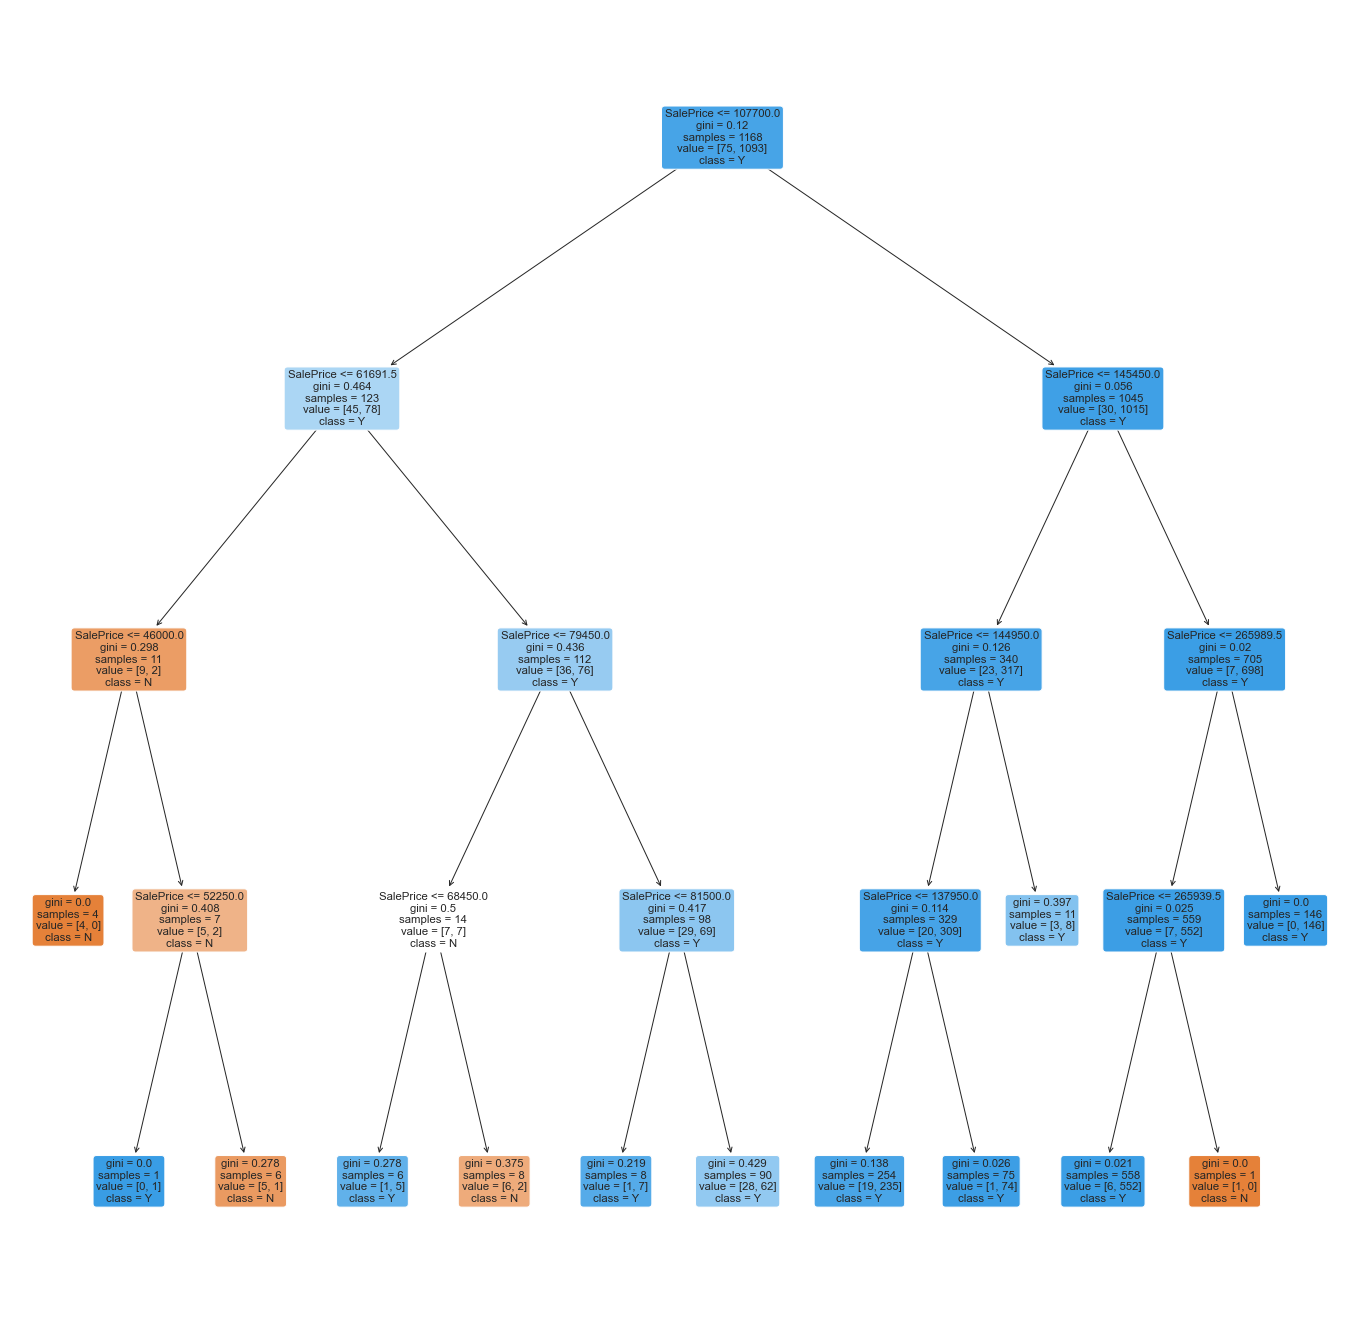

In [57]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Recall the CA-SP Dataset
CA = pd.DataFrame(house_data['CentralAir'])   # Response
SP = pd.DataFrame(house_data['SalePrice'])       # Predictor

# Split the CA-SP Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(SP, CA, test_size = 0.2)
#X could be a matrix thus capitalized

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4) 
dectree.fit(X_train, y_train)                   

# Predict CA values corresponding to SP
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)


# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=["SalePrice"], 
          class_names=["N","Y"])



This leaf node has the highest number of False Positives (21)

#### Condition to reach that leaf node is 81500.0 < SP <= 107700.0

In [59]:
house_data_fil = pd.DataFrame()
#house_data_fil = pd.DataFrame(y_train)
house_data_fil['SalePrice']=X_train
house_data_fil['CentralAir']=y_train
house_data_fil

,SalePrice,CentralAir
1019,213490,Y
376,148000,Y
270,266000,Y
602,220000,Y
42,144000,Y
...,...,...
1070,135000,Y
243,120000,Y
938,239799,Y
716,159500,Y


In [60]:
house_data_fil = house_data_fil[house_data_fil['SalePrice'] > 81500.0]
house_data_fil = house_data_fil[house_data_fil['SalePrice'] <= 107700.0]

house_data_fil

,SalePrice,CentralAir
1135,102000,N
344,85000,Y
198,104000,Y
1000,82000,N
696,89000,Y
...,...,...
17,90000,Y
638,85000,Y
972,99500,Y
392,106500,Y


(b) Print ONLY the False Positive cases (rows from the dataframe) from the samples (rows) extracted in part (a). 

In [61]:
display = house_data_fil[house_data_fil['CentralAir'] == "N"]
display

,SalePrice,CentralAir
1135,102000,N
1000,82000,N
1137,94000,N
1412,90000,N
896,106500,N
749,98000,N
1090,92900,N
998,91000,N
1035,84000,N
217,107000,N


In [62]:
display.shape

(28, 2)